In [1]:
using Plots, Random, LinearAlgebra, Statistics

In [2]:
"""plot line y = w*x+b"""
function plotline(w,b;
                  xmin=-100,xmax=100,label="")
    xsamples = [xmin, xmax]
    plot!(xsamples, [w*x+b for x in xsamples], color=:black, label=label)
end

plotline

In [3]:
"""plot function y=f(x)"""
function plotfunc(f;
                  xmin=-100,xmax=100,nsamples=100,label="")
    xsamples = LinRange(xmin,xmax,nsamples)
    plot!(xsamples, [f(x) for x in xsamples], color=:black, label=label)
end

plotfunc

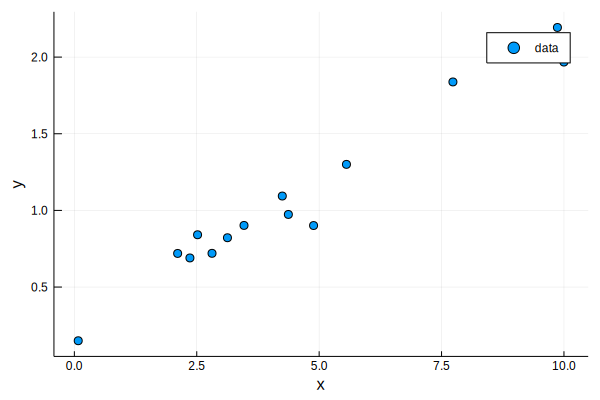

In [4]:
# Generate and plot data
Random.seed!(1)
n = 15
function sample_data(num_points)
    x = rand(num_points)*10
    y = .2 .+ .2*x + .1*sin.(x) + .1*randn(num_points) - .01*((x.-5)/6).^4
    return x,y
end
x,y = sample_data(n)

"""function to plot the above data"""
function plotdata(x=x,y=y; margin=.05)
    scatter(x,y, label="data")
    xlabel!("x")
    ylabel!("y")
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
    xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
end
plotdata()

# Approximating with the mean

In [5]:
# the mean solves a very simple least squares problem:
X = ones(n,1)
w = X\y

1-element Array{Float64,1}:
 1.1418154306154014

In [6]:
# check the solution to our least squares problem is the mean
abs(mean(y) - w[1])

0.0

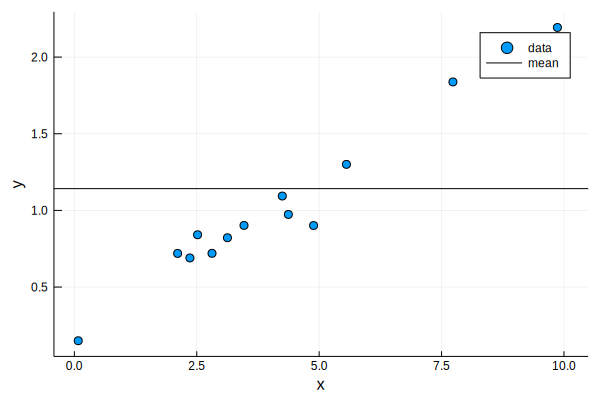

In [7]:
# plot the fit
plotdata()
plotline(0, w[1], label="mean")

# Approximating with a line

In [8]:
X = [copy(x) ones(length(x))]

15×2 Array{Float64,2}:
 2.36033    1.0
 3.46517    1.0
 3.12707    1.0
 0.0790928  1.0
 4.88613    1.0
 2.10968    1.0
 9.51916    1.0
 9.99905    1.0
 2.51662    1.0
 9.86666    1.0
 5.55751    1.0
 4.37108    1.0
 4.24718    1.0
 7.73223    1.0
 2.8119     1.0

In [9]:
w = X\y

2-element Array{Float64,1}:
 0.1889327554101744 
 0.22676530293763508

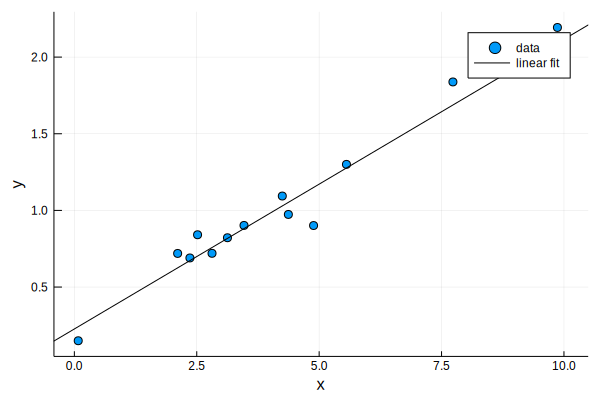

In [10]:
# plot the fit
plotdata()
plotline(w[1], w[2], label="linear fit")

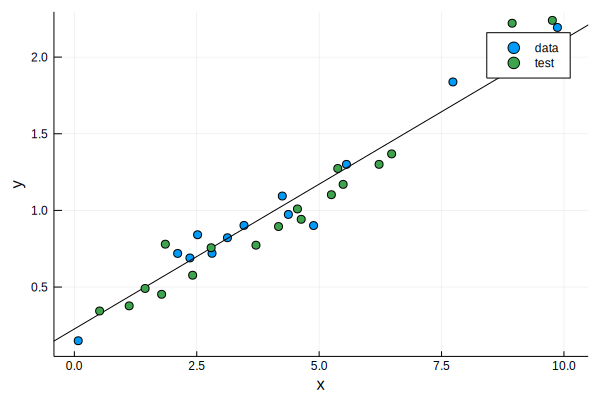

In [11]:
# plot fit on out of sample data
plotdata()
plotline(w[1], w[2])

xtest,ytest = sample_data(20)
scatter!(xtest,ytest,label="test")

# Approximating with a polynomial

In [12]:
# first, construct a Vandermonde matrix
max_order = 5

X = zeros(n, max_order+1)
for k=0:max_order
    X[:,k+1] = x.^k
end
X

15×6 Array{Float64,2}:
 1.0  2.36033     5.57117      13.1498         31.038          73.26      
 1.0  3.46517    12.0074       41.6077        144.178         499.6       
 1.0  3.12707     9.77856      30.5783         95.6203        299.011     
 1.0  0.0790928   0.00625568    0.000494779     3.91335e-5      3.09518e-6
 1.0  4.88613    23.8742      116.653         569.98         2784.99      
 1.0  2.10968     4.45076       9.38968        19.8092         41.7912    
 1.0  9.51916    90.6145      862.574        8210.98        78161.7       
 1.0  9.99905    99.9809      999.714        9996.19        99952.3       
 1.0  2.51662     6.33339      15.9387         40.1118        100.946     
 1.0  9.86666    97.3511      960.53         9477.23        93508.6       
 1.0  5.55751    30.8859      171.649         953.94         5301.53      
 1.0  4.37108    19.1063       83.5153        365.052        1595.67      
 1.0  4.24718    18.0385       76.6128        325.388        1381.98      
 1

In [13]:
# solve least squares problem
w = X\y

6-element Array{Float64,1}:
  0.10558936436615048  
  0.5606100384313613   
 -0.1905966594443474   
  0.033358010961549604 
 -0.0020687395040778983
  2.7195080191545342e-5

In [14]:
"""computes our polynomial fit evaluated at x"""
function p(x; order = max_order, w = w)
    y = 0
    for k=0:order
        y += w[k+1]*x^k
    end
    return y
end

p

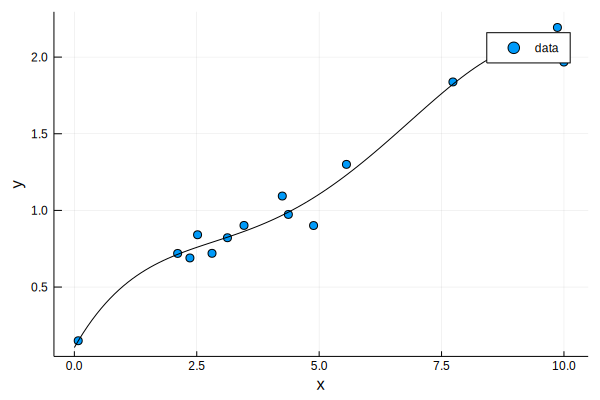

In [15]:
# plot fit
plotdata()
plotfunc(x -> p(x, order=max_order, w=w), xmin=0, xmax=9)

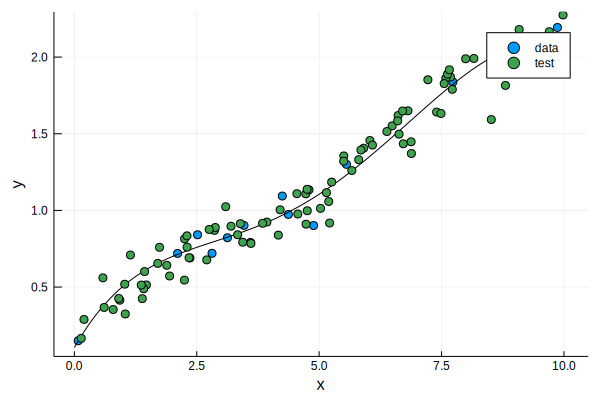

In [16]:
# plot fit on out of sample data
plotdata()
plotfunc(x -> p(x, order=max_order, w=w), xmin=0, xmax=9)

xtest,ytest = sample_data(100)
scatter!(xtest,ytest,label="test")

# Choosing the best model order

In [17]:
max_model_order = 10
rmse = zeros(max_model_order+1) # array to store root mean square model errors
xtest,ytest = sample_data(50)   # generate test set

for model_order = 0:max_model_order
    # form Vandermonde matrix
    X = zeros(n, model_order+1)
    for k=0:model_order
        X[:,k+1] = x.^k
    end
    
    # solve least squares problem
    w = X\y
    
    # compute test error
    ptest = [p(x, order=model_order, w=w) for x in xtest]
    rmse[model_order+1] = sqrt(mean((ytest - ptest).^2))
end
rmse

11-element Array{Float64,1}:
 0.6524523244155412 
 0.12020765549135483
 0.12194249997646882
 0.12323375063708153
 0.10271765819471274
 0.10166344230028489
 0.10592223849150063
 0.11797064212502545
 0.6471646654779816 
 0.3767984813791739 
 2.4820154230718177 

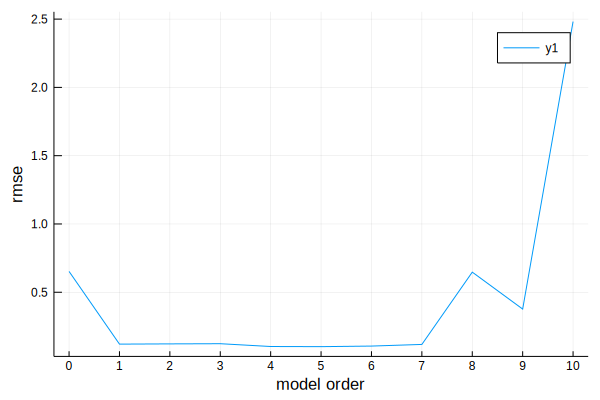

In [18]:
plot(0:max_model_order,rmse)
xticks!(0:10)
xlabel!("model order")
ylabel!("rmse")

# Polynomial models for classification

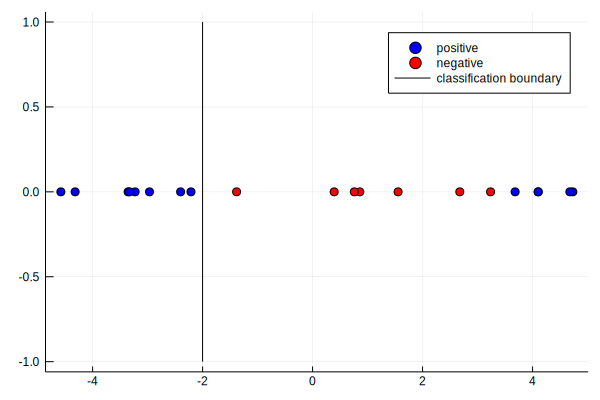

In [94]:
Random.seed!(0)
n = 20
xs = 10*(rand(n) .- .5)
ys = (xs).^2
pos = (xs .- 1).^2 .>= 7
zn=zeros(n)
pt = scatter(xs[pos],zn[pos],color="blue", label="positive")
scatter!(xs[.!pos],zn[.!pos],color="red", label="negative")
plot!([-2,-2], [-1,1], color="black", label="classification boundary")#, ticks=:none, border=:none, legend=false)
yaxis!([-1,1])
savefig("poly-class-1d.pdf")
pt

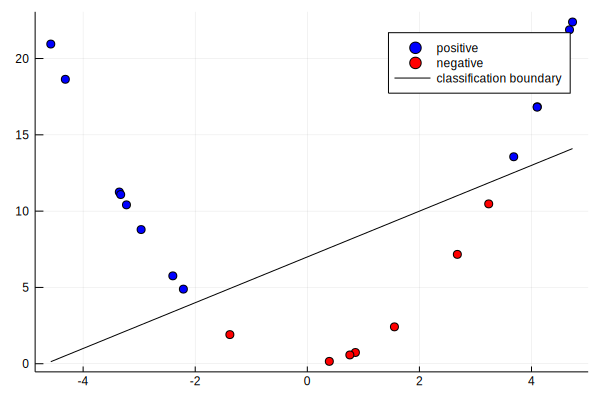

In [95]:
pt = scatter(xs[pos],ys[pos],color="blue", label="positive")
scatter!(xs[.!pos],ys[.!pos],color="red", label="negative")
plot!(xs, 1.5*xs .+ 7, color="black", label="classification boundary")
savefig("poly-class-2d.pdf")
pt

# Bootstrap estimators

In [93]:
# sample K data sets of n samples each and compute a model on each
# see how the models vary
n = 20
K = 10

models = zeros(K,2)
for k=1:K
    xk,yk = sample_data(n)
    Xk = [xk ones(n)]
    wk = Xk \ yk
    models[k,:] = wk
end

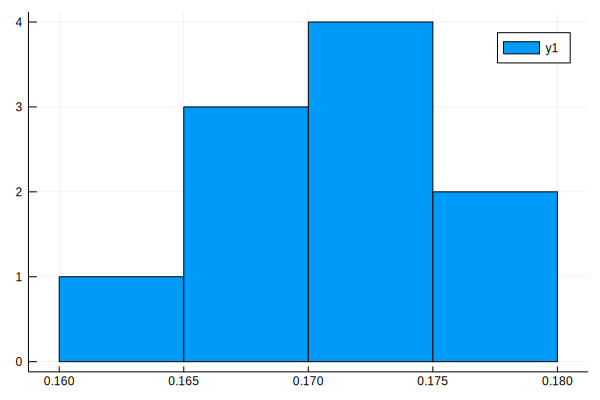

In [94]:
# histogram of the distribution of the first coefficient
# could use to compute, eg, confidence intervals

histogram(models[:,1])

In [101]:
mean(models, dims=1)

1×2 Array{Float64,2}:
 0.171546  0.264002

In [102]:
var(models,dims=1)

1×2 Array{Float64,2}:
 2.55827e-5  0.000902145

In [103]:
# can sample with replacement using rand
rand(1:15, 5)

# eg,
a = 0:.1:1.5
s = rand(1:15, 5)
[s a[s]]

5×2 Array{Float64,2}:
 11.0  1.0
  2.0  0.1
 10.0  0.9
  1.0  0.0
  4.0  0.3

In [104]:
# resample K bootstrap data sets of n samples each and compute a model on each
# see how the models vary
n = 20
K = 100

x,y = sample_data(n)

models = zeros(K,2)
for k=1:K
    mysample = rand(1:n,n)
    xk,yk = x[mysample], y[mysample]
    Xk = [xk ones(n)]
    wk = Xk \ yk
    models[k,:] = wk
end

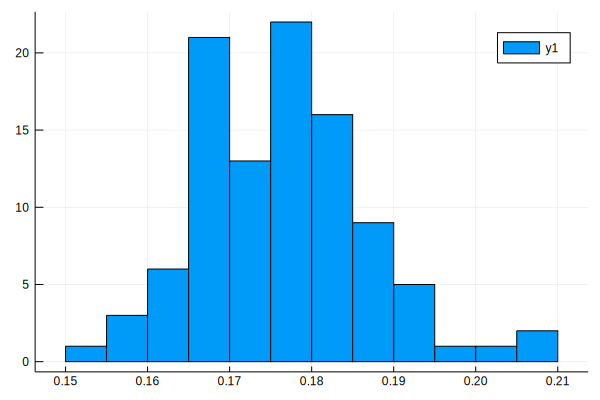

In [105]:
histogram(models[:,1])

In [107]:
mean(models,dims=1)

1×2 Array{Float64,2}:
 0.176542  0.209861

In [108]:
# as K increases, mean of the bootstrap models should converge to 
# the model fit on the original data set
X = [x ones(n)]
w = X \ y

2-element Array{Float64,1}:
 0.1734876648311583 
 0.22884459574119137

In [109]:
var(models,dims=1)

1×2 Array{Float64,2}:
 0.000105268  0.00384538